In [10]:
# Importing Libraries

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [41]:
# Estamos usando a biblioteca PANDAS para manipular arquivos CSV. Veja documentação.
# https://pandas.pydata.org/docs/user_guide/index.html

file_path = './1D-particle.csv' 

# O arquivo 1D-particle.csv contém valores de tempo, posição e velocidade de uma partícula em um 
# movimento undimensional.
# Arquivo CSV contem os dados onde as colunas são os targets/features.

df = pd.read_csv(file_path) # Criando o dataframe df com os dados do arquivo : 1D-particle.csv

# Display the DataFrame 
print(df.head(10)) # Imprimindo as 10 primeras entradas do dataframe df


   time   position  velocity
0   0.0   0.275124  0.068781
1   0.5  -2.490374  0.314907
2   1.0   2.895749  2.473937
3   1.5   1.018659  2.692165
4   2.0   3.739457  3.934864
5   2.5   5.965233  4.928808
6   3.0  14.937978  7.484495
7   3.5  13.522415  7.318104
8   4.0  12.010554  7.002639
9   4.5  23.261492  9.752873


In [42]:
# Convertendo as colunas do dataframe df em arrays
t = df['time'].values
x = df['position'].values
v = df['velocity'].values

In [6]:
# Faça um gráfico de posição x tempo. No fim deste notebooke tem um exemplo de gráfico.

In [ ]:
# Faça um gráfico de velocidade x tempo

In [8]:
# INCLUDE A CODE TO CALCULATE A AND B PARAMETER VIA BRUTE FORCE.
# OUR COST FUNCTION IS THE MEAN SQUARED ERROR. 

# Assumindo uma relação linear Y = A + B*x, para o nosso caso específico v(t) = A + B*t,
# determine qual o melhor valor de A e B. Neste ponto a nossa função custo é o mínimo dos 
# quadrados dos resíduos. Onde utilizamos o erro quadrático médio (Mean Squard Error - MSE)


# Defina o intervalo de variação para A
# Defina o intervalo de variação para B

# Loop para A
# Loop para B
    # Calcule a soma para todos os pontos de (y - (A+B*t))²/N. N é o número total de pontos.
    # o menor valor da quantidade

A = np.arange(-1,1,.001)
B = np.arange(-3.0,3.0,.001)


MSE_min=float('inf')

for i in range(len(A)):
    for j in range(len(B)):
        MSE=np.sum(pow(A[i]+B[j]*t-v_noise,2))/v.shape[0]
        if( MSE < MSE_min):
            A_min=A[i]
            B_min=B[j]
            MSE_min = MSE

print(A_min,B_min,MSE_min)
velocity_BF = A_min+B_min*t



0.09000000000000097 1.9899999999994504 0.3323663296652193


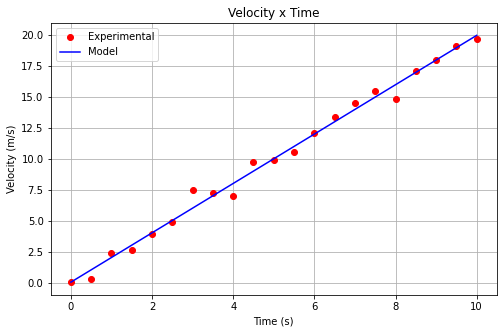

In [11]:
# Plotting
plt.figure(figsize=(8, 5))
plt.plot(t, v_noise, 'o', color='red',label='Experimental')
plt.plot(t, velocity_BF, '-', color='blue', label='Model')

#plt.axvline(x=0.0, ymin=[0.0], ymax=[15.0], color='green', label='axvline - full height')

plt.title('Velocity x Time')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.grid(True)
plt.legend()
plt.savefig('noisy_velocity_vs_time.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

# Documentação Regressão Linear : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

model = LinearRegression()               # Inclua um cometário sobre o algoritimo de regressão linear.

X = np.array([[1], [2], [3], [4], [5]])  # Input features 
y = np.array([11, 23, 29, 41, 52])       # Target


model.fit(X,y)                           # Obtendo os parâmetros via Regressão Linear. 

# y = A + B*X
B = model.coef_                          # Inclua um comentário sobre a interpretação do parâmetro B
A = model.intercept_                     # Inclua um comentário sobre a interpretação do parâmetro A

print("Coeficiente:", A)
print("Intercepto:", B)

# Valored preditos pelo modelo.
y_pred[:] = A + B*X[:]

# Adapte o código acima para o nosso caso. Determiando os valores de A e B
# Note que a função LinearRegression tem como input um array (n_targets, n_features)
# Com isso é necessário fazer uma transformação no array de temporal :
# t_new = t.reshape((t.shape[0], 1))
 


Coeficiente: 1.1999999999999922
Intercepto: [10.]


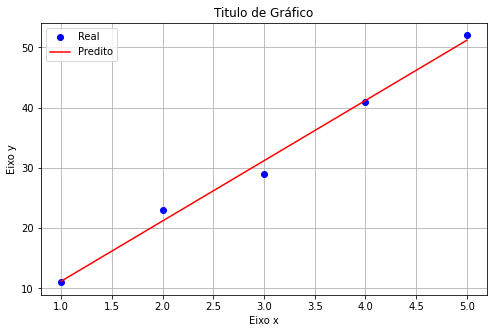

In [35]:
# Exemplo de Gráfico
plt.figure(figsize=(8, 5))

plt.plot(X,y, 'o', color='blue',label='Real')        # Gráfico dos valored reais
plt.plot(X,y_pred, '-', color='red',label='Predito') # Gráfico dos valores preditos pelo modelo



plt.title('Titulo de Gráfico')
plt.xlabel('Eixo x')
plt.ylabel('Eixo y')
plt.grid(True)
plt.legend()
#lt.savefig('nome_gráfico.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

# Documentação Regressão Linear : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

model = LinearRegression() 


t_new = t.reshape((t.shape[0], 1))

model.fit(t_new,v_noise)


coefficients = model.coef_
intercept = model.intercept_

velocity_LR = intercept+coefficients*t



print("Coefficients:", coefficients)
print("Intercept:", intercept)


Coefficients: [1.99016027]
Intercept: 0.0890819925509998


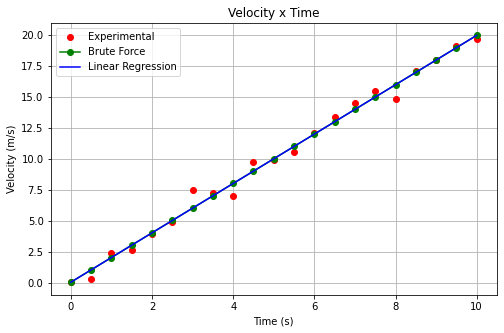

In [14]:
# Faça o gráfico dos pontos experimentais junto com as retas obtidas pelo método força bruta e pela regressão linear 
# da biblioteca scikit-learn. Note que os coeficientes dos dois métodos devem ser muito próximos e as curvas podem ficar 
# quase indistinguíveis.


plt.figure(figsize=(8, 5))

plt.plot(t, v_noise, 'o', color='red',label='Experimental')
plt.plot(t, velocity_BF, 'o-', color='green', label='Brute Force')
plt.plot(t, velocity_LR, '-', color='blue', label='Linear Regression')


plt.title('Velocity x Time')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.grid(True)
plt.legend()
plt.savefig('noisy_velocity_vs_time.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()
